In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input, Activation
from keras import optimizers
from keras.callbacks import History
import numpy as np
from keras.optimizers import Adam
from keras.losses import mean_squared_error

In [ ]:
"""
!pip install finta
from finta import TA"""

'\n!pip install finta\nfrom finta import TA'

In [ ]:
from google.colab import files
files.upload()

Saving Adam Sugar Mills Limited.csv to Adam Sugar Mills Limited.csv


{'Adam Sugar Mills Limited.csv': b'Date,Open,High,Low,Close,Volume\r\n30/1/01,9,9,9,9,1000\r\n26/2/01,9,7.45,7,7,1500\r\n2/3/01,7,6.5,5,5,2500\r\n12/3/01,5,6,5.9,6,1000\r\n2/4/01,6,6,6,6,0\r\n6/4/01,6,4.8,4.75,4.8,10000\r\n10/4/01,4.8,5.5,5.5,5.5,500\r\n26/4/01,5.5,7,5.1,7,4500\r\n17/5/01,7,4.25,4,4,2000\r\n18/5/01,4,4.7,4.5,4.7,1000\r\n21/5/01,4.7,4.1,4.1,4.1,500\r\n24/5/01,4.1,4.65,4.5,4.65,3000\r\n30/5/01,4.65,5.5,5.25,5.5,3000\r\n1/6/01,5.5,5.5,5.5,5.5,5000\r\n7/6/01,5.5,5.9,5.7,5.9,1000\r\n8/6/01,5.9,5.9,5.9,5.9,500\r\n4/7/01,5.9,6,6,6,1000\r\n20/8/01,6,5,5,5,500\r\n1/11/01,5,5.25,5.25,5.25,500\r\n2/1/02,5.25,5.85,5.85,5.85,500\r\n15/1/02,5.85,5.85,5.55,5.55,1000\r\n15/2/02,5.55,6,6,6,1000\r\n18/2/02,6,5.5,5.5,5.5,1500\r\n21/2/02,5.5,5.5,5.5,5.5,1000\r\n4/4/02,5.5,4.75,4.75,4.75,0\r\n5/4/02,4.75,4.5,4.5,4.5,0\r\n11/4/02,4.5,4.25,4.25,4.25,0\r\n12/4/02,4.25,4,4,4,500\r\n15/4/02,4,4.05,4.05,4.05,4500\r\n16/4/02,4.05,4.2,4.2,4.2,0\r\n17/4/02,4.2,4.25,4.25,4.25,0\r\n18/4/02,4.25,4.25,

In [ ]:
data = pd.read_csv("/content/Adam Sugar Mills Limited.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,30/1/01,9.0,9.00,9.0,9.0,1000
1,26/2/01,9.0,7.45,7.0,7.0,1500
2,2/3/01,7.0,6.50,5.0,5.0,2500
3,12/3/01,5.0,6.00,5.9,6.0,1000
4,2/4/01,6.0,6.00,6.0,6.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3229 non-null   object 
 1   Open    3229 non-null   float64
 2   High    3229 non-null   float64
 3   Low     3229 non-null   float64
 4   Close   3229 non-null   float64
 5   Volume  3229 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 151.5+ KB


In [ ]:
ohlc = data[['Open','Close' ,'High', "Low","Volume"]]

In [ ]:
"""# Here are all indicators we are using
#indicators = ['EMA','DEMA','TRIMA','VW_MACD', 'EV_MACD', 'ROC', 'RSI']
indicators = ['EMA', 'DEMA','MACD',"TRIMA",'RSI']

df = None
# Using python’s eval function to create a method from a string instead of having every method defined
for indicator in indicators:
  df = eval('TA.'+ indicator + '(ohlc)')
  # Some method return series, so we can check to convert here
  if not isinstance(df, pd.DataFrame):
    df = df.to_frame()
# Appropriate labels on each column
  col_name = indicator
  df = df.rename(columns={0:col_name})
  data = pd.concat([data,df],axis = 1)
"""

'# Here are all indicators we are using\n#indicators = [\'EMA\',\'DEMA\',\'TRIMA\',\'VW_MACD\', \'EV_MACD\', \'ROC\', \'RSI\']\nindicators = [\'EMA\', \'DEMA\',\'MACD\',"TRIMA",\'RSI\']\n\ndf = None\n# Using python’s eval function to create a method from a string instead of having every method defined\nfor indicator in indicators:\n  df = eval(\'TA.\'+ indicator + \'(ohlc)\')\n  # Some method return series, so we can check to convert here\n  if not isinstance(df, pd.DataFrame):\n    df = df.to_frame()\n# Appropriate labels on each column\n  col_name = indicator\n  df = df.rename(columns={0:col_name})\n  data = pd.concat([data,df],axis = 1)\n'

In [ ]:
for col in data:
  prev_val = None
  for index, val in enumerate(data[col]):
    if val == 0 or val == 0.0 or val == 0.00:
      data.at[index,col] = prev_val
    else:
      prev_val = val


In [ ]:
data['Upper_Cap'] = None
data['Lower_Cap'] = None

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Upper_Cap,Lower_Cap
0,30/1/01,9.0,9.00,9.0,9.0,1000,None,None
1,26/2/01,9.0,7.45,7.0,7.0,1500,None,None
2,2/3/01,7.0,6.50,5.0,5.0,2500,None,None
3,12/3/01,5.0,6.00,5.9,6.0,1000,None,None
4,2/4/01,6.0,6.00,6.0,6.0,1000,None,None


In [ ]:
def upper_cap(open_prices):
  for i in range(len(data)-1):
    x = data.Close[i] * 0.075
    if x > 1:
      data.at[i+1,'Upper_Cap'] = float(data.Close[i] + x)
    else:
      data.at[i+1, 'Upper_Cap'] = float(data.Close[i] + 1)

upper_cap(data['Close'])

In [ ]:
def lower_cap(open_prices):
  for i in range(len(data)-1):
    x = data.Close[i] * 0.075

    if x > 1:
      data.at[i+1, 'Lower_Cap'] = float(data.Close[i] - x)
    else:
      data.at[i+1, 'Lower_Cap'] = float(data.Close[i] - 1)


lower_cap(data['Close'])

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Upper_Cap,Lower_Cap
0,30/1/01,9.0,9.00,9.0,9.0,1000,None,None
1,26/2/01,9.0,7.45,7.0,7.0,1500,10.0,8.0
2,2/3/01,7.0,6.50,5.0,5.0,2500,8.0,6.0
3,12/3/01,5.0,6.00,5.9,6.0,1000,6.0,4.0
4,2/4/01,6.0,6.00,6.0,6.0,1000,7.0,5.0


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Volume,Upper_Cap,Lower_Cap
3224,4/11/22,24.31,25.34,24.30,25.34,4000,27.78875,23.91125
3225,7/11/22,25.79,25.79,25.49,25.50,2000,27.2405,23.4395
3226,8/11/22,25.50,25.79,25.50,25.79,15000,27.4125,23.5875
3227,10/11/22,25.10,25.73,25.10,25.73,1000,27.72425,23.85575
3228,11/11/22,26.24,26.24,26.24,26.24,500,27.65975,23.80025


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3229 non-null   object 
 1   Open       3229 non-null   float64
 2   High       3229 non-null   float64
 3   Low        3229 non-null   float64
 4   Close      3229 non-null   float64
 5   Volume     3229 non-null   int64  
 6   Upper_Cap  3228 non-null   object 
 7   Lower_Cap  3228 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 201.9+ KB


In [ ]:
data.Upper_Cap = data.Upper_Cap.astype(float)
data.Lower_Cap = data.Lower_Cap.astype(float)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3229 non-null   object 
 1   Open       3229 non-null   float64
 2   High       3229 non-null   float64
 3   Low        3229 non-null   float64
 4   Close      3229 non-null   float64
 5   Volume     3229 non-null   int64  
 6   Upper_Cap  3228 non-null   float64
 7   Lower_Cap  3228 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 201.9+ KB


In [ ]:
data = data.dropna()

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Upper_Cap,Lower_Cap
1,26/2/01,9.00,7.45,7.00,7.00,1500,10.00000,8.00000
2,2/3/01,7.00,6.50,5.00,5.00,2500,8.00000,6.00000
3,12/3/01,5.00,6.00,5.90,6.00,1000,6.00000,4.00000
4,2/4/01,6.00,6.00,6.00,6.00,1000,7.00000,5.00000
5,6/4/01,6.00,4.80,4.75,4.80,10000,7.00000,5.00000
...,...,...,...,...,...,...,...,...
3224,4/11/22,24.31,25.34,24.30,25.34,4000,27.78875,23.91125
3225,7/11/22,25.79,25.79,25.49,25.50,2000,27.24050,23.43950
3226,8/11/22,25.50,25.79,25.50,25.79,15000,27.41250,23.58750
3227,10/11/22,25.10,25.73,25.10,25.73,1000,27.72425,23.85575


<Axes: xlabel='Date', ylabel='Open'>

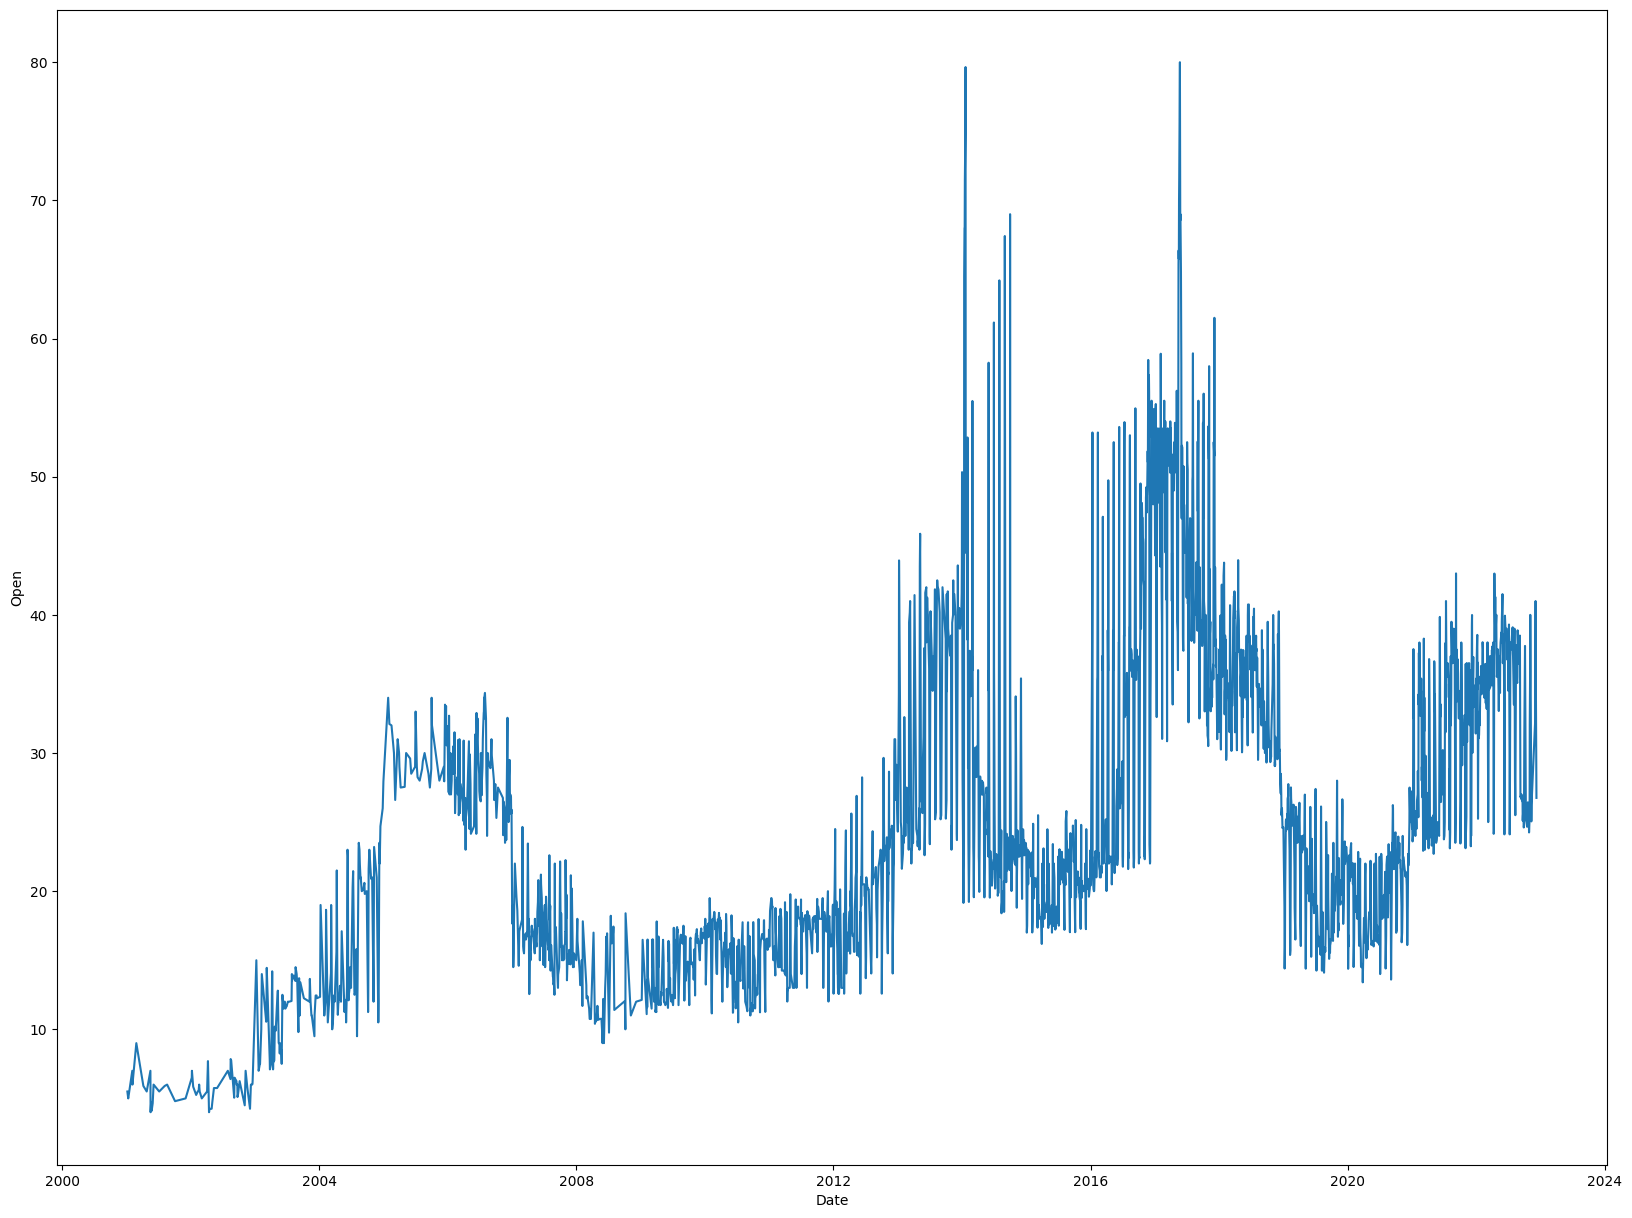

In [ ]:
import seaborn as sns
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(20,15))
sns.lineplot(data = data, x ='Date' ,y = 'Open' )

<Axes: xlabel='Volume', ylabel='Open'>

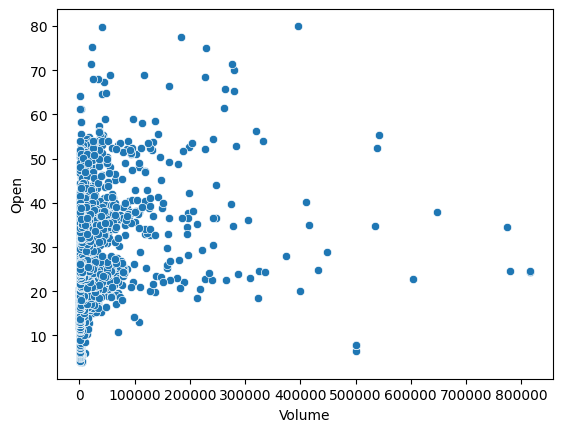

In [ ]:
plt.figure()
sns.scatterplot(data = data, x ='Volume' ,y = 'Open' )

In [ ]:
correlation = data.corr()

<ipython-input-22-d9a448acd2ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

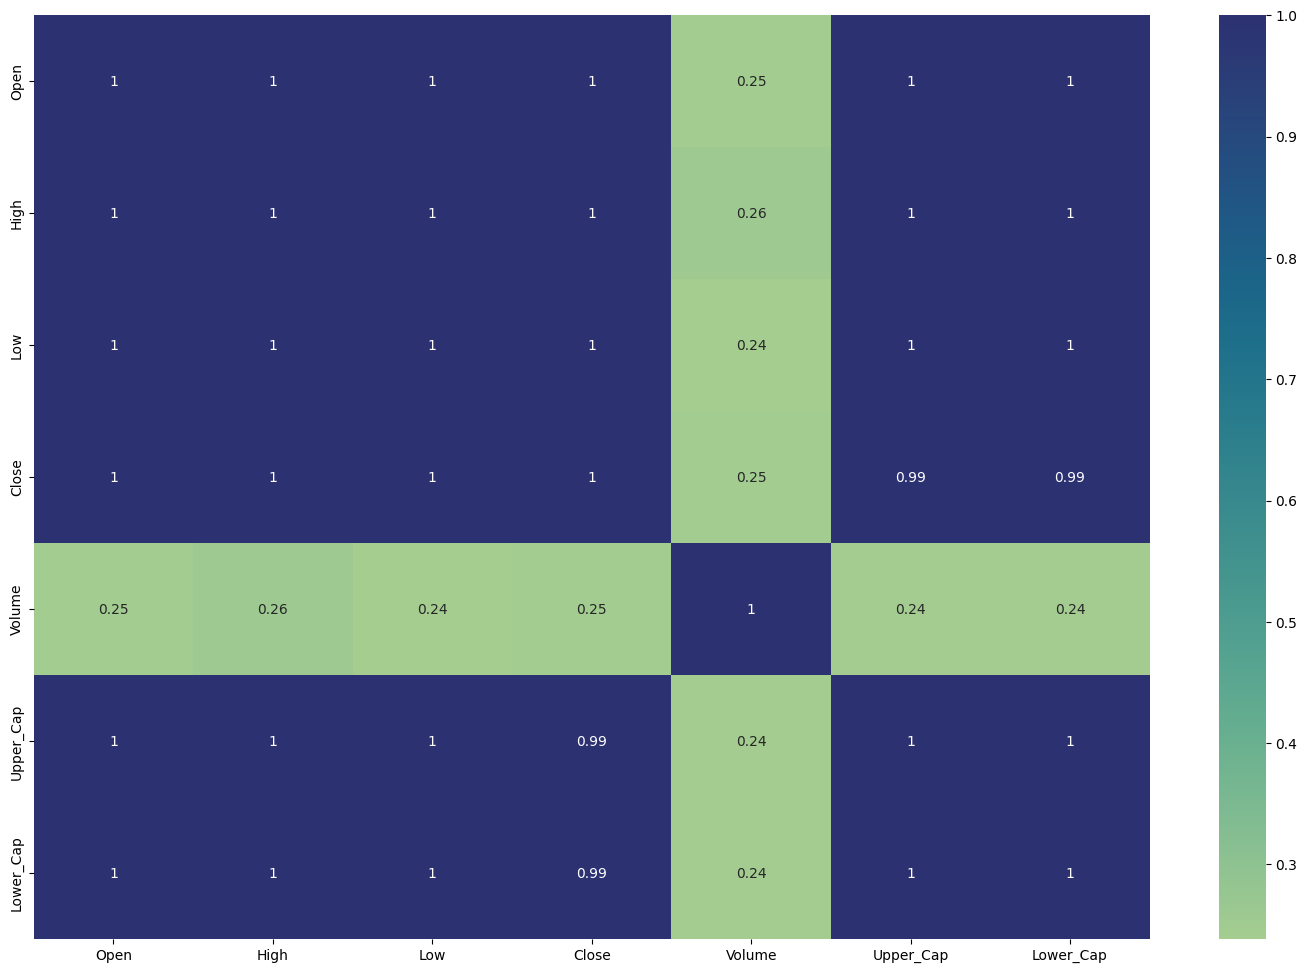

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(correlation, annot=True ,cmap='crest')

In [ ]:
#data.drop(columns = 'Date', inplace=True)
#col for col in data.columns if str(data[col].dtypes) in ['int64', 'float64']
features = ['Open','High','Low','Close']

new_data= data[features]


In [ ]:
new_data = new_data.drop_duplicates()

In [ ]:
history_points = 45
train_data = new_data[:int(len(data)*0.7)]
validation_data = new_data[int(len(data)*0.7):int(len(data)*0.85)]
test_data = new_data[len(train_data) + len(validation_data)-history_points:]

In [ ]:
validation_data = validation_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
normaliser = preprocessing.MinMaxScaler()
y_normaliser = preprocessing.MinMaxScaler()

In [ ]:
X_train_normalised_data = normaliser.fit_transform(train_data)
X_validation_normalised_data = normaliser.fit_transform(validation_data)
X_test_normalised_data = normaliser.transform(test_data)

In [ ]:
y_train_normalised_data = y_normaliser.fit_transform(train_data[['Open','High','Low','Close']])
y_validation_normalised_data = y_normaliser.fit_transform(validation_data[['Open','High','Low','Close']])
y_test_normalised_data = y_normaliser.transform(test_data[['Open','High','Low','Close']])

In [ ]:
X_train_normalised_data

array([[0.06578947, 0.04417979, 0.0401714 , 0.03964059],
       [0.03947368, 0.03201434, 0.01339047, 0.01321353],
       [0.01315789, 0.02561147, 0.02544189, 0.02642706],
       ...,
       [0.42105263, 0.43923678, 0.42193358, 0.44529598],
       [0.41986842, 0.44051735, 0.42728977, 0.4464852 ],
       [0.45381579, 0.45332309, 0.44188538, 0.44542812]])

In [ ]:
X_train = np.array([X_train_normalised_data[i : i + history_points].copy() for i in range(len(X_train_normalised_data) - history_points)], dtype = 'float')
y_train = np.array([y_train_normalised_data[i + history_points  : i  + history_points+ 1].copy() for i in range(len(y_train_normalised_data) - history_points)], dtype = 'float')


X_validation = np.array([X_validation_normalised_data[i : i + history_points].copy() for i in range(len(X_validation_normalised_data) - history_points )], dtype = 'float')
y_validation = np.array([y_validation_normalised_data[(i + history_points) : (i + history_points + 1)].copy() for i in range(len(y_validation_normalised_data) - history_points)], dtype = 'float')


X_test = np.array([X_test_normalised_data[i : i + history_points].copy() for i in range(len(X_test_normalised_data) - history_points)], dtype = 'float')
y_test = np.array([test_data[['Open','High','Low','Close']][(i + history_points) : (i + history_points + 1)].copy() for i in range(len(y_test_normalised_data) - history_points)], dtype = 'float')


In [ ]:
X_validation.shape

(439, 45, 4)

In [ ]:
y_validation.shape

(439, 1, 4)

In [ ]:
X_test.shape

(338, 45, 4)

In [ ]:
y_test.shape

(338, 1, 4)

In [ ]:
#X_train = X_train.reshape(X_train.shape[1],X_train.shape[0],X_train.shape[2])


In [ ]:
X_train.shape

(2214, 45, 4)

In [ ]:
y_train.shape

(2214, 1, 4)

In [ ]:
from keras.layers import Input, LSTM, Dense, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import mean_squared_error
import numpy as np

from keras.callbacks import Callback

# Define a custom callback
class LossThresholdCallback(Callback):
    def __init__(self, threshold=0.000):
        super(LossThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}

        # Check if the current loss is below the threshold
        if logs.get('loss') < self.threshold:
            print(f"Training stopped as loss ({logs.get('loss')}) is below the threshold ({self.threshold})")
            self.model.stop_training = True


# Assuming X_train and y_train are your data
#X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
loss_threshold_callback = LossThresholdCallback(threshold=0.000)


In [ ]:
## Build the LSTM model
from keras.layers import Reshape

model = Sequential()
model.add(LSTM(264, return_sequences=True, input_shape= (X_train.shape[1], X_train.shape[2])))
#model.add(Dropout(0.2))
#model.add(LSTM(512, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
#model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
#
#model.add(Dropout(0.1))
model.add(Dense(4))

adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='mean_squared_error')


In [ ]:
model.fit(x=X_train, y=y_train, batch_size = 1,epochs=50, validation_data = (X_validation, y_validation), callbacks=[loss_threshold_callback])

Epoch 1/50
2214/2214 [==============================] - 32s 12ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 2/50
2214/2214 [==============================] - 25s 11ms/step - loss: 9.7477e-04 - val_loss: 0.0019
Epoch 3/50
2214/2214 [==============================] - 25s 11ms/step - loss: 9.0200e-04 - val_loss: 0.0012
Epoch 4/50
2214/2214 [==============================] - 25s 11ms/step - loss: 6.5344e-04 - val_loss: 0.0016
Epoch 5/50
2214/2214 [==============================] - 25s 11ms/step - loss: 7.2238e-04 - val_loss: 0.0012
Epoch 6/50
2214/2214 [==============================] - 25s 11ms/step - loss: 5.6141e-04 - val_loss: 0.0051
Epoch 7/50
2214/2214 [==============================] - 25s 11ms/step - loss: 7.6472e-04 - val_loss: 0.0011
Epoch 8/50
2214/2214 [==============================] - 25s 11ms/step - loss: 6.0024e-04 - val_loss: 0.0010
Epoch 9/50
2214/2214 [==============================] - 25s 11ms/step - loss: 4.0622e-04 - val_loss: 0.0011
Epoch 10/50
2214/2214 [=========

In [ ]:
preds = model.predict(X_test)
"""
max = y_test.max()
min = y_test.min()
preds = (preds * (max - min)) + min

preds[0,0,0].shape"""

11/11 [==============================] - 2s 8ms/step


'\nmax = y_test.max()\nmin = y_test.min()\npreds = (preds * (max - min)) + min\n\npreds[0,0,0].shape'

In [ ]:

preds = y_normaliser.inverse_transform(preds)
preds.shape

(338, 4)

In [ ]:
y_test = y_test.reshape(y_test.shape[0],y_test.shape[2])
#y_test[0] = y_normaliser.inverse_transform(y_test[0])
y_test.shape

IndexError: ignored

In [ ]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test[:,0], preds[:,0])
rmse = np.sqrt(mse)
rmse

1.2784155850522378

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test[:,1], preds[:,1])
rmse = np.sqrt(mse)
rmse

1.1382528293501546

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test[:,2], preds[:,2])
rmse = np.sqrt(mse)
rmse

1.5098953616495412

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test[:,3], preds[:,3])
rmse = np.sqrt(mse)
rmse

1.2589008329184563

In [ ]:
model.save('/content/ADAMS_1for90_1.5.h5')

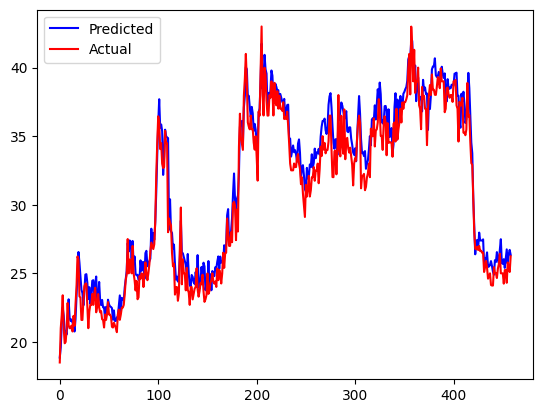

In [ ]:
plt.plot(preds[:,0], color='blue', label='Predicted')
plt.plot(y_test[:,0], color='red', label='Actual')
plt.legend()

plt.show()


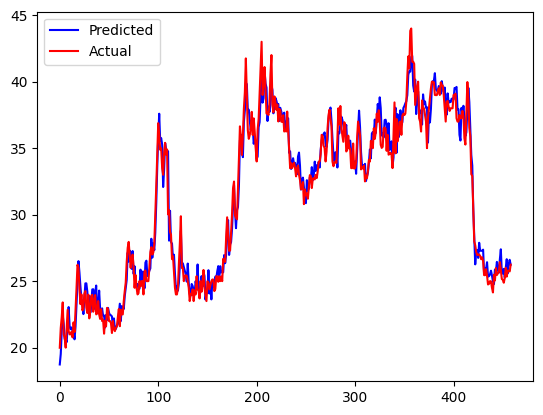

In [ ]:
plt.plot(preds[:,1], color='blue', label='Predicted')
plt.plot(y_test[:,1], color='red', label='Actual')
plt.legend()

plt.show()


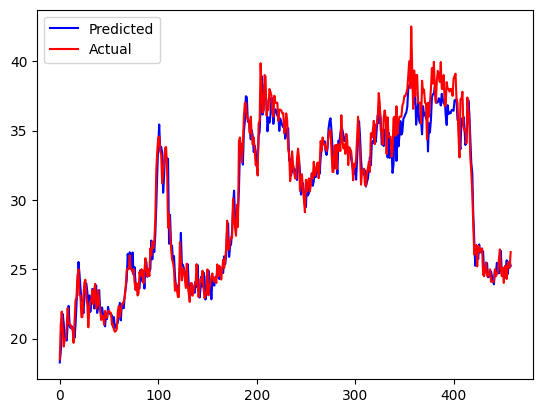

In [ ]:
plt.plot(preds[:,2], color='blue', label='Predicted')
plt.plot(y_test[:,2], color='red', label='Actual')
plt.legend()

plt.show()
